In [163]:
#!pip instal pandas-gbq
from pandas.io import gbq
import pandas as pd

In [164]:
query=""" SELECT * FROM `my-project-egen.egen_bigquery.flight` """

In [167]:
df= gbq.read_gbq(query,project_id='my-project-egen')

Downloading: 100%|████████████████████████████████████████████████████████████████| 398/398 [00:00<00:00, 984.94rows/s]


In [168]:
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0
1,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0
2,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,193.0,173.0,1464,529.0,3.0,545,532.0,-13.0,0,0
3,2015,1,1,4,AA,1674,N853AA,LAS,MIA,35,...,266.0,238.0,2174,746.0,7.0,803,753.0,-10.0,0,0
4,2015,1,1,4,AA,371,N3GXAA,SEA,MIA,100,...,347.0,311.0,2724,933.0,6.0,938,939.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,2015,1,1,4,OO,5254,N746SK,MAF,IAH,510,...,NaN,NaN,429,NaN,NaN,637,NaN,NaN,0,1
394,2015,1,1,4,OO,5318,N946SW,CMX,ORD,600,...,NaN,NaN,359,NaN,NaN,627,NaN,NaN,0,1
395,2015,1,1,4,OO,5445,N579SW,SMF,SFO,600,...,NaN,NaN,86,NaN,NaN,652,NaN,NaN,0,1
396,2015,1,1,4,OO,6457,N560SW,SMX,LAX,545,...,NaN,NaN,134,NaN,NaN,651,NaN,NaN,0,1


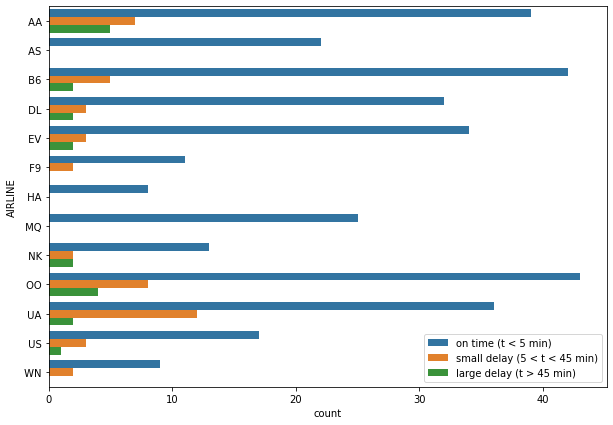

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
df['DELAY_LEVEL'] = df['DEPARTURE_DELAY'].apply(delay_type)
#____________________________________________________
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="AIRLINE", hue='DELAY_LEVEL', data=df)

# Set the legend
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

In [116]:
df = df.drop('AIRLINE', axis=1)
df = df.drop('ORIGIN_AIRPORT',axis=1)
df = df.drop('DESTINATION_AIRPORT',axis=1)
df = df.drop('TAIL_NUMBER',axis=1)
# df = df.drop('YEAR',axis=1)
# df = df.drop('MONTH',axis=1)
# df = df.drop('DAY',axis=1)

In [117]:
df.isnull().sum()

YEAR                    0
MONTH                   0
DAY                     0
DAY_OF_WEEK             0
FLIGHT_NUMBER           0
SCHEDULED_DEPARTURE     0
DEPARTURE_TIME         35
DEPARTURE_DELAY        35
TAXI_OUT               35
WHEELS_OFF             35
SCHEDULED_TIME          0
ELAPSED_TIME           35
AIR_TIME               35
DISTANCE                0
WHEELS_ON              35
TAXI_IN                35
SCHEDULED_ARRIVAL       0
ARRIVAL_TIME           35
ARRIVAL_DELAY          35
DIVERTED                0
CANCELLED               0
dtype: int64

In [141]:
flights=df.interpolate()

# df = df.fillna({'ARRIVAL_DELAY': 1})
# df = df.fillna({'ARRIVAL_DELAY': 1})
# df = df.fillna({'ARRIVAL_DELAY': 1})
# df = df.fillna({'ARRIVAL_DELAY': 1})
# df = df.fillna({'ARRIVAL_DELAY': 1})
# df = df.fillna({'ARRIVAL_DELAY': 1})
# df = df.fillna({'ARRIVAL_DELAY': 1})
# df = df.fillna({'ARRIVAL_DELAY': 1})
# df = df.fillna({'ARRIVAL_DELAY': 1})

In [142]:
df.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
FLIGHT_NUMBER          0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
dtype: int64

In [135]:
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [137]:
data = df.values
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)  # splitting in the ratio 70:30

In [138]:
scaled_features = StandardScaler().fit_transform(X_train, X_test)

In [139]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)


In [140]:
pred_prob = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
auc_score

1.0

In [150]:
predicted = model.predict(test_x)
model.score(test_x, test_y)

0.1625

In [151]:
predicted

array([ -1.,   0.,  -1., -12.,  -5.,  -5.,   0., -21., -11., -21.,  13.,
         0., -14., -15., -10.,  86.,   0.,  -6.,  -5.,   0., -19.,  -3.,
         0., -11., -10.,   0.,  -4.,   0., -19., -19.,   0.,   0., -40.,
       -11.,   2.,  -3.,  19.,  -1.,   1.,   8.,   4., -19., -15.,  -4.,
       -17.,   0.,  24.,   9., -22., -26., -13.,  -7., -10., -11.,   3.,
        78.,  -9.,  -5.,  33., -11.,   1.,   8.,  -4., -19.,   9.,   2.,
         3.,  54., -14., -18.,  19., -13., -10., -13.,   0., -10.,  -4.,
         0., -19.,  13.])